You just got hired as the first and only data practitioner at a small business experiencing exponential growth. The company needs more structured processes, guidelines, and standards. Your first mission is to structure the human resources data. The data is currently scattered across teams and files and comes in various formats: Excel files, CSVs, JSON files...

You'll work with the following data in the `datasets` folder:
- __Office addresses__ are currently saved in `office_addresses.csv`. If the value for office is `NaN`, then the employee is remote. 
- __Employee addresses__ are saved on the first tab of `employee_information.xlsx`.
- __Employee emergency contacts__ are saved on the second tab of `employee_information.xlsx`; this tab is called `emergency_contacts`. However, this sheet was edited at some point, and the headers were removed! The HR manager let you know that they should be: `employee_id`, `last_name`, `first_name`, `emergency_contact`, `emergency_contact_number`, and `relationship`.
- __Employee roles, teams, and salaries__ have been exported from the company's human resources management system into a JSON file titled `employee_roles.json`. Here are the first few lines of that file:
```
{"A2R5H9":
  {
    "title": "CEO",
    "monthly_salary": "$4500",
    "team": "Leadership"
  },
 ...
}

# PROJETO GUIADO

In [119]:
import pandas as pd
# Start coding here... 


In [120]:
dados = pd.read_csv("datasets/office_addresses.csv")
dados

,office,office_country,office_city,office_street,office_street_number
0,Leuven Office,BE,Leuven,Martelarenlaan,38
1,ESB Office,US,New York City,Fifth Avenue,350
2,WeWork Office,GB,London,Old Street,207


In [121]:
addresses =  pd.read_excel("datasets/employee_information.xlsx", usecols=["employee_id", "employee_country", "employee_city", "employee_street", "employee_street_number"])
addresses

,employee_id,employee_country,employee_city,employee_street,employee_street_number
0,A2R5H9,BE,Leuven,Grote Markt,9
1,H8K0L6,GB,London,Baker Street,221
2,G4R7V0,US,New-York,Perry Street,66
3,M1Z7U9,FR,Paris,Rue de l'Université,7


## Lendo arquivo xlsx

In [122]:
addresses = pd.read_excel("datasets/employee_information.xlsx")
addresses

,employee_id,employee_last_name,employee_first_name,employee_country,employee_city,employee_street,employee_street_number
0,A2R5H9,Hunman,Jax,BE,Leuven,Grote Markt,9
1,H8K0L6,Siff,Tara,GB,London,Baker Street,221
2,G4R7V0,Sagal,Gemma,US,New-York,Perry Street,66
3,M1Z7U9,Coates,Tig,FR,Paris,Rue de l'Université,7


## Filtrando colunas

In [123]:
addresses_cols = addresses[{"employee_id", "employee_country", "employee_city", "employee_street", "employee_street_number"}]

addresses_cols

,employee_street_number,employee_country,employee_city,employee_id,employee_street
0,9,BE,Leuven,A2R5H9,Grote Markt
1,221,GB,London,H8K0L6,Baker Street
2,66,US,New-York,G4R7V0,Perry Street
3,7,FR,Paris,M1Z7U9,Rue de l'Université


## Filtrando colunas usando usecols

In [124]:
addresses =  pd.read_excel("datasets/employee_information.xlsx", usecols=["employee_id", "employee_country", "employee_city", "employee_street", "employee_street_number"])

addresses


,employee_id,employee_country,employee_city,employee_street,employee_street_number
0,A2R5H9,BE,Leuven,Grote Markt,9
1,H8K0L6,GB,London,Baker Street,221
2,G4R7V0,US,New-York,Perry Street,66
3,M1Z7U9,FR,Paris,Rue de l'Université,7


In [125]:
emergency_contacts_header = ["employee_id", "last_name", "first_name",
                             "emergency_contact", "emergency_contact_number", "relationship"]

In [126]:
emergency_contacts = pd.read_excel("datasets/employee_information.xlsx", 
                                   sheet_name="emergency_contacts", 
                                   header=None,
                                   names=emergency_contacts_header)

emergency_contacts

,employee_id,last_name,first_name,emergency_contact,emergency_contact_number,relationship
0,A2R5H9,Hunman,Jax,Opie Hurst,+32-456-5556-84,Brother
1,H8K0L6,Siff,Tara,Wendy de Matteo,+44-020-5554-333,Sister
2,G4R7V0,Sagal,Gemma,John Newmark,+1-202-555-194,Husband
3,M1Z7U9,Coates,Tig,Venus Noone,+1-202-555-0130,Wife


## Mesclando os DataFrames

In [127]:
roles = pd.read_json("datasets/employee_roles.json", orient="index")

In [128]:
employees = addresses.merge(dados, left_on="employee_country", right_on="office_country", how="left")

In [129]:
employees = employees.merge(roles, left_on="employee_id", right_on=roles.index)

In [130]:
employees = employees.merge(emergency_contacts, on="employee_id")

In [131]:
for col in ["office", "office_country", "office_city", "office_street", "office_street_number"]:
    employees[col].fillna("Remote", inplace=True)

In [132]:
final_columns = ["employee_id", "first_name", "last_name", "employee_country", 
                 "employee_city", "employee_street", "employee_street_number", 
                 "emergency_contact", "emergency_contact_number", "relationship", 
                 "monthly_salary", "team", "title", "office", "office_country", 
                 "office_city", "office_street", "office_street_number"]

In [133]:
employees_final = employees[final_columns]


In [134]:
employees_final.set_index("employee_id", inplace=True)

# PROJETO NÃO GUIADO

## Distribuição de frequência

In [135]:
employees_final

,first_name,last_name,employee_country,employee_city,employee_street,employee_street_number,emergency_contact,emergency_contact_number,relationship,monthly_salary,team,title,office,office_country,office_city,office_street,office_street_number
employee_id,,,,,,,,,,,,,,,,,
A2R5H9,Jax,Hunman,BE,Leuven,Grote Markt,9,Opie Hurst,+32-456-5556-84,Brother,$4500,Leadership,CEO,Leuven Office,BE,Leuven,Martelarenlaan,38.0
H8K0L6,Tara,Siff,GB,London,Baker Street,221,Wendy de Matteo,+44-020-5554-333,Sister,$4500,Leadership,CFO,WeWork Office,GB,London,Old Street,207.0
G4R7V0,Gemma,Sagal,US,New-York,Perry Street,66,John Newmark,+1-202-555-194,Husband,$3000,Sales,Business Developer,ESB Office,US,New York City,Fifth Avenue,350.0
M1Z7U9,Tig,Coates,FR,Paris,Rue de l'Université,7,Venus Noone,+1-202-555-0130,Wife,$2000,People Operations,Office Manager,Remote,Remote,Remote,Remote,Remote


## Número de ocorrências

In [136]:
employees_final["team"].value_counts()

Leadership           2
Sales                1
People Operations    1
Name: team, dtype: int64

## Porcentagens dos valores

In [137]:
employees_final["team"].value_counts(normalize = True)*100

Leadership           50.0
Sales                25.0
People Operations    25.0
Name: team, dtype: float64

## Definindo as variáveis 

In [138]:
frequencia = employees_final["team"].value_counts()

percentual = employees_final["team"].value_counts(normalize = True)*100

## DataFrame

In [139]:
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})

## Alterando DataFrame

In [140]:
dist_freq_qualitativas.rename(index = {0: 'Leadership', 1: 'Sales', 2: 'People Operations'}, inplace = True)

# Adicionando nome no índice
# inplace = True é para salvar as alterações em dist_freq_qualitativas

In [141]:
dist_freq_qualitativas.rename_axis('Equipe', axis = 'columns', inplace = True)
# Colocando nome na coluna

## Percentual por equipe

In [142]:
dist_freq_qualitativas

Equipe,Frequência,Porcentagem(%)
Leadership,2,50.0
Sales,1,25.0
People Operations,1,25.0


In [143]:
# dist_freq_qualitativas["Porcentagem(%)"].hist()

In [144]:
# dist_freq_qualitativas["Frequência"].hist()

## Média salarial por equipe

In [145]:
team = {0: "Leadership", 1: "Sales", 2: "People Operations"}

monthly_salary = {0: "$4500", 1: "$3000", 2: "$2000"}

# frequencia = pd.crosstab(dist_freq_qualitativas.team, dist_freq_qualitativas.monthly_salary)


teste = pd.DataFrame({'Equipe': team, 'Salário': monthly_salary})
teste

,Equipe,Salário
0,Leadership,$4500
1,Sales,$3000
2,People Operations,$2000


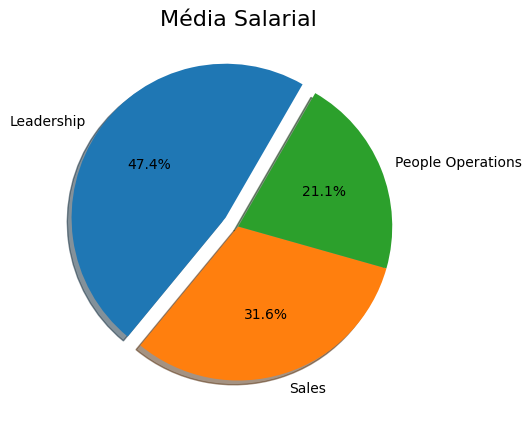

In [146]:
import matplotlib.pyplot as plt

equipe = ['Leadership', 'Sales', 'People Operations']
salario = [4500, 3000, 2000]

fig, ax = plt.subplots(figsize=(12, 5))

explode = (0.1, 0, 0)

ax.pie(salario, labels=equipe, autopct="%.1f%%", shadow=True, explode=explode, startangle=60)

ax.set_title('Média Salarial', fontsize=16)

plt.show()

## Moda

In [147]:
employees_final["monthly_salary"].mode()

0    $4500
Name: monthly_salary, dtype: object

## Qual a relação entre monthly_salary e employee_city ?


In [148]:
import plotly.express as px

In [149]:
# employees_final.hist(column="employee_city", bins=100)
# plt.show()
px.histogram(employees_final, x="monthly_salary", color="employee_city", histnorm="probability density")
# color -> monthly_salary/employee_city
# histnorm="probability density" -> probabilidade de ocorrência da faixa de valor
#  color_discrete_sequence=["blue", "green", "pink", "orange"] -> como colocar as cores

## Qual a relação entre employee_city e team ?

In [150]:
# import plotly.figure_factory as ff
# import numpy as np
# ff.create_distplot([employees_final['employee_street_number']], group_labels=['Employee_city'])

In [151]:
px.histogram(employees_final, x="employee_city", color="team", histnorm="probability density") 

## Qual a relação entre employee_country, title e monthly_salary ?

In [152]:
import plotly.express as px
px.scatter(employees_final, x="employee_country", y="title", color="monthly_salary")
